# Explore National Dataset

This notebook is used to explore the `rivm-covid-19-national.csv` dataset. It contains various graph that visualize the data in the dataset.

In [1]:
import pandas as pd

## Load dataset

In [2]:
df = pd.read_csv("../data/processed/rivm-covid-19-national.csv")

In [3]:
df["PositiefGetest"] = df["PositiefGetest"].astype(int)
df["Opgenomen"] = df["Opgenomen"].astype(int)
df["Overleden"] = df["Overleden"].astype(int)
df["Datum"] = pd.to_datetime(df["Datum"])

In [4]:
df["PositiefGetestCumulatief"] = df["PositiefGetest"].cumsum(axis=0)
df["OpgenomenCumulatief"] = df["Opgenomen"].cumsum(axis=0)
df["OverledenCumulatief"] = df["Overleden"].cumsum(axis=0)

## Inspect dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   PositiefGetest            431 non-null    int64         
 1   Opgenomen                 431 non-null    int64         
 2   Overleden                 431 non-null    int64         
 3   Datum                     431 non-null    datetime64[ns]
 4   PositiefGetestCumulatief  431 non-null    int64         
 5   OpgenomenCumulatief       431 non-null    int64         
 6   OverledenCumulatief       431 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 23.7 KB


In [6]:
df.head()

,PositiefGetest,Opgenomen,Overleden,Datum,PositiefGetestCumulatief,OpgenomenCumulatief,OverledenCumulatief
0,0,1,0,2020-02-27,0,1,0
1,1,0,0,2020-02-28,1,1,0
2,1,1,0,2020-02-29,2,2,0
3,3,0,0,2020-03-01,5,2,0
4,5,0,0,2020-03-02,10,2,0


In [7]:
df.tail()

,PositiefGetest,Opgenomen,Overleden,Datum,PositiefGetestCumulatief,OpgenomenCumulatief,OverledenCumulatief
426,8626,76,11,2021-04-28,1475854,28433,17083
427,7233,64,20,2021-04-29,1483087,28497,17103
428,7718,78,22,2021-04-30,1490805,28575,17125
429,5737,102,21,2021-05-01,1496542,28677,17146
430,5434,24,3,2021-05-02,1501976,28701,17149


## Visualize cases per day

<AxesSubplot:xlabel='Datum'>

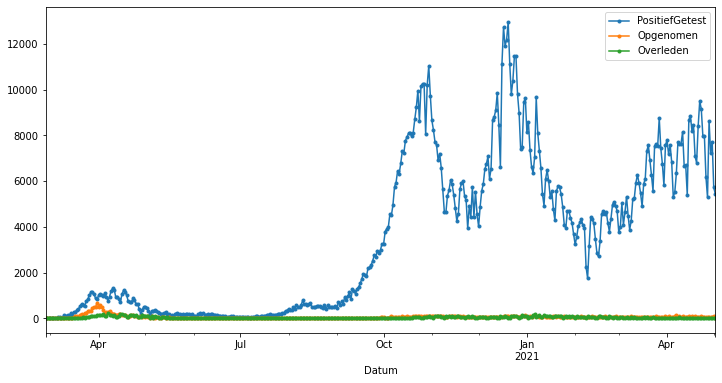

In [8]:
df.plot(
    x="Datum",
    y=["PositiefGetest", "Opgenomen", "Overleden"],
    figsize=(12,6),
    style=".-",
)

## Visualize cumulative per day

<AxesSubplot:xlabel='Datum'>

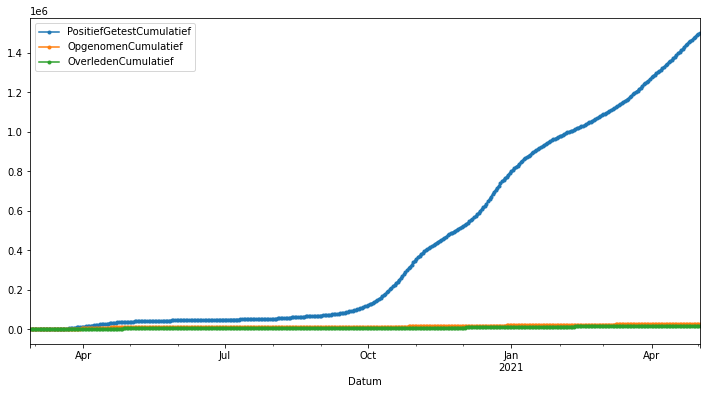

In [9]:
df.plot(
    x="Datum",
    y=["PositiefGetestCumulatief", "OpgenomenCumulatief", "OverledenCumulatief"],
    figsize=(12,6),
    style=".-",
)